## MNIST dataset classification algorithm

In [2]:

import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd

Training and testing data separation

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

 Exemplary digit

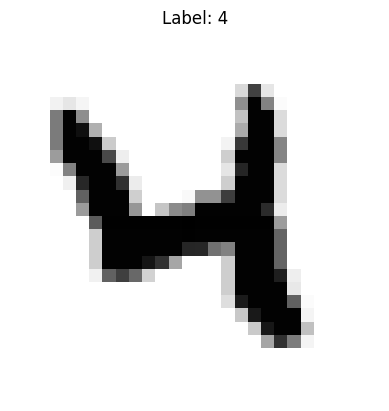

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


some_digit = X_train[20]
some_digit = some_digit.reshape(28,28)

plt.imshow(some_digit, cmap = matplotlib.cm.binary);
plt.axis("off");
plt.title("Label: "+str(y_train[20]));

Shuffling data

In [5]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Exemplary binary classifier for one type of digit - Stochastic Gradient Descent 

In [6]:
y_train_5 = y_train==5
y_test_5 =  y_test==5

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Cross-validation

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv= 3, scoring = "accuracy")

array([0.8978, 0.9668, 0.9241])

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

Confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[51015,  3564],
       [  662,  4759]], dtype=int64)

Precision and recall

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.5717890183827946

In [12]:
recall_score(y_train_5, y_train_pred)

0.8778823095369858

F1 score

In [13]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.6925203725261933

Exploring decision function

In [14]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [15]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label = "Recall")
    plt.xlabel("Threshold")
    plt.ylim([0,1])

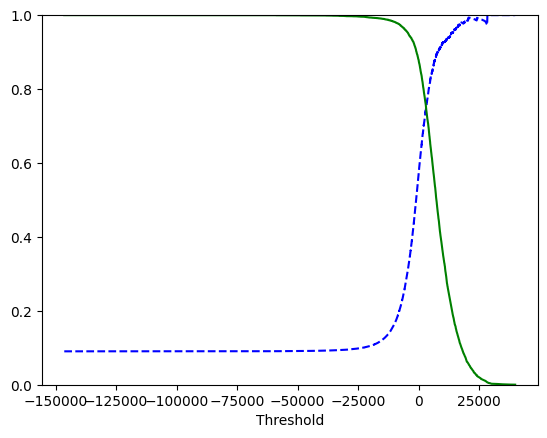

In [16]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


ROC curve

0.9588984229534968

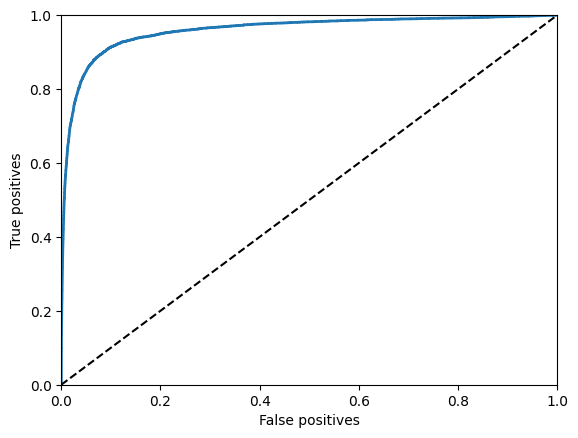

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr, linewidth =2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positives')
    plt.ylabel('True positives')

plot_roc_curve(fpr,tpr)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = "predict_proba")

In [22]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

0.998339963768006

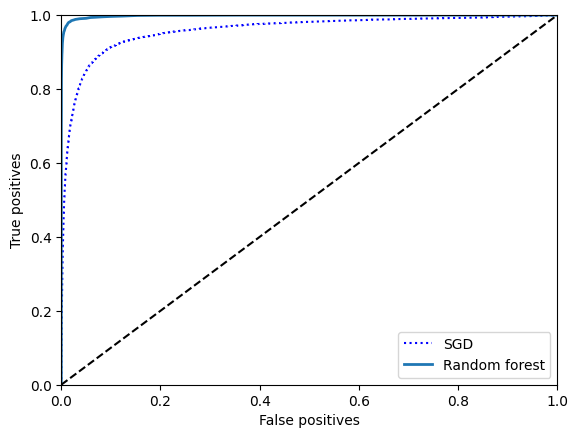

In [26]:
plt.plot(fpr,tpr,"b:",label="SGD");
plot_roc_curve(fpr_forest, tpr_forest, "Random forest")
plt.legend(loc="lower right");
roc_auc_score(y_train_5, y_scores_forest)

Confusion matrix

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = "accuracy")

array([0.901 , 0.8967, 0.9044])

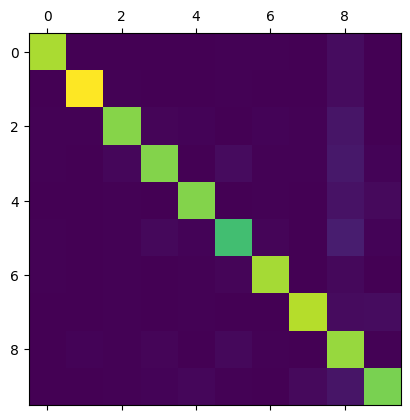

In [29]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx)

Displaying only mistakes

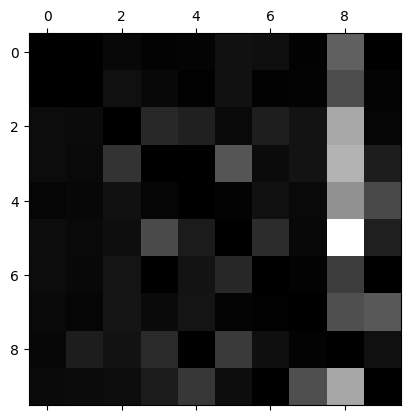

In [31]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray);
